In [2]:
import pandas as pd

# Load the CSV file (replace with your actual file path)
df = pd.read_csv('C:/Users/chash/Downloads/KaggleV2-May-2016.csv (1)/KaggleV2-May-2016.csv')

# Check the first few rows
print(df.head())
print(df.info())


      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0      

In [4]:
print(df.columns)


Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')


In [6]:
# Drop rows with missing values in crucial columns (like PatientId or AppointmentDay)
df.dropna(subset=['PatientId', 'AppointmentDay'], inplace=True)

# Fill other missing values with appropriate defaults (like 0 or 'Unknown')
df['SMS_received'].fillna(0, inplace=True)
df['Age'].fillna(df['Age'].median(), inplace=True)

# Check for any remaining missing values
print(df.isnull().sum())



PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


In [7]:
# Convert date columns to datetime format
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

# Extract the appointment weekday
df['AppointmentWeekday'] = df['AppointmentDay'].dt.day_name()

# Calculate the waiting time (days between scheduling and appointment)
df['WaitingTime'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

# Correct negative waiting times (if any)
df['WaitingTime'] = df['WaitingTime'].apply(lambda x: max(x, 0))

print(df[['ScheduledDay', 'AppointmentDay', 'AppointmentWeekday', 'WaitingTime']].head())


               ScheduledDay            AppointmentDay AppointmentWeekday  \
0 2016-04-29 18:38:08+00:00 2016-04-29 00:00:00+00:00             Friday   
1 2016-04-29 16:08:27+00:00 2016-04-29 00:00:00+00:00             Friday   
2 2016-04-29 16:19:04+00:00 2016-04-29 00:00:00+00:00             Friday   
3 2016-04-29 17:29:31+00:00 2016-04-29 00:00:00+00:00             Friday   
4 2016-04-29 16:07:23+00:00 2016-04-29 00:00:00+00:00             Friday   

   WaitingTime  
0            0  
1            0  
2            0  
3            0  
4            0  


In [8]:
# Create a binary column for SMS received (already in most datasets)
df['SMS_Reminder'] = df['SMS_received'].apply(lambda x: 1 if x > 0 else 0)

# Create a binary column for No-Show (1 if missed, 0 if attended)
df['NoShow'] = df['No-show'].apply(lambda x: 1 if x == 'Yes' else 0)

print(df[['SMS_Reminder', 'NoShow']].head())


   SMS_Reminder  NoShow
0             0       0
1             0       0
2             0       0
3             0       0
4             0       0


In [9]:
# Define age buckets
def age_bucket(age):
    if age < 18:
        return 'Child'
    elif age < 40:
        return 'Adult'
    elif age < 60:
        return 'Middle-aged'
    else:
        return 'Senior'

df['AgeGroup'] = df['Age'].apply(age_bucket)

print(df[['Age', 'AgeGroup']].head())


   Age     AgeGroup
0   62       Senior
1   56  Middle-aged
2   62       Senior
3    8        Child
4   56  Middle-aged


In [10]:
from sklearn.preprocessing import LabelEncoder

# Encoding gender
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])

# One-hot encode day of the week
df = pd.get_dummies(df, columns=['AppointmentWeekday', 'AgeGroup'], drop_first=True)

print(df.head())


      PatientId  AppointmentID  Gender              ScheduledDay  \
0  2.987250e+13        5642903       0 2016-04-29 18:38:08+00:00   
1  5.589978e+14        5642503       1 2016-04-29 16:08:27+00:00   
2  4.262962e+12        5642549       0 2016-04-29 16:19:04+00:00   
3  8.679512e+11        5642828       0 2016-04-29 17:29:31+00:00   
4  8.841186e+12        5642494       0 2016-04-29 16:07:23+00:00   

             AppointmentDay  Age      Neighbourhood  Scholarship  \
0 2016-04-29 00:00:00+00:00   62    JARDIM DA PENHA            0   
1 2016-04-29 00:00:00+00:00   56    JARDIM DA PENHA            0   
2 2016-04-29 00:00:00+00:00   62      MATA DA PRAIA            0   
3 2016-04-29 00:00:00+00:00    8  PONTAL DE CAMBURI            0   
4 2016-04-29 00:00:00+00:00   56    JARDIM DA PENHA            0   

   Hipertension  Diabetes  ...  SMS_Reminder  NoShow  \
0             1         0  ...             0       0   
1             0         0  ...             0       0   
2             

In [12]:
# Drop columns not useful for prediction
df.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay', 'No-show'], axis=1, inplace=True)

print(df.head())


   Gender  Age      Neighbourhood  Scholarship  Hipertension  Diabetes  \
0       0   62    JARDIM DA PENHA            0             1         0   
1       1   56    JARDIM DA PENHA            0             0         0   
2       0   62      MATA DA PRAIA            0             0         0   
3       0    8  PONTAL DE CAMBURI            0             0         0   
4       0   56    JARDIM DA PENHA            0             1         1   

   Alcoholism  Handcap  SMS_received  WaitingTime  SMS_Reminder  NoShow  \
0           0        0             0            0             0       0   
1           0        0             0            0             0       0   
2           0        0             0            0             0       0   
3           0        0             0            0             0       0   
4           0        0             0            0             0       0   

   AppointmentWeekday_Monday  AppointmentWeekday_Saturday  \
0                      False               

In [13]:
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 20 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Gender                        110527 non-null  int32 
 1   Age                           110527 non-null  int64 
 2   Neighbourhood                 110527 non-null  object
 3   Scholarship                   110527 non-null  int64 
 4   Hipertension                  110527 non-null  int64 
 5   Diabetes                      110527 non-null  int64 
 6   Alcoholism                    110527 non-null  int64 
 7   Handcap                       110527 non-null  int64 
 8   SMS_received                  110527 non-null  int64 
 9   WaitingTime                   110527 non-null  int64 
 10  SMS_Reminder                  110527 non-null  int64 
 11  NoShow                        110527 non-null  int64 
 12  AppointmentWeekday_Monday     110527 non-null  bool  
 13 

In [14]:
df.to_csv('cleaned_appointments.csv', index=False)
print("Data cleaned and saved successfully!")


Data cleaned and saved successfully!


In [26]:
import pandas as pd

# Load cleaned data
df = pd.read_csv('cleaned_appointments.csv')

# Check the data
print(df.head())
print(df.info())


   Gender  Age      Neighbourhood  Scholarship  Hipertension  Diabetes  \
0       0   62    JARDIM DA PENHA            0             1         0   
1       1   56    JARDIM DA PENHA            0             0         0   
2       0   62      MATA DA PRAIA            0             0         0   
3       0    8  PONTAL DE CAMBURI            0             0         0   
4       0   56    JARDIM DA PENHA            0             1         1   

   Alcoholism  Handcap  SMS_received  WaitingTime  SMS_Reminder  NoShow  \
0           0        0             0            0             0       0   
1           0        0             0            0             0       0   
2           0        0             0            0             0       0   
3           0        0             0            0             0       0   
4           0        0             0            0             0       0   

   AppointmentWeekday_Monday  AppointmentWeekday_Saturday  \
0                      False               

In [34]:
from sklearn.model_selection import train_test_split

# Features (X) and target variable (y)
X = df.drop('NoShow', axis=1)  # All columns except 'NoShow'
y = df['NoShow']               # Target: No-Show (1 if missed, 0 if attended)

# Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")




Training samples: 88421, Testing samples: 22106


In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and train the model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)



In [32]:
print(X.dtypes)


Gender                           int64
Age                              int64
Neighbourhood                   object
Scholarship                      int64
Hipertension                     int64
Diabetes                         int64
Alcoholism                       int64
Handcap                          int64
SMS_received                     int64
WaitingTime                      int64
SMS_Reminder                     int64
AppointmentWeekday_Monday         bool
AppointmentWeekday_Saturday       bool
AppointmentWeekday_Thursday       bool
AppointmentWeekday_Tuesday        bool
AppointmentWeekday_Wednesday      bool
AgeGroup_Child                    bool
AgeGroup_Middle-aged              bool
AgeGroup_Senior                   bool
dtype: object


In [33]:
X_encoded = pd.get_dummies(X, drop_first=True)
print(X_encoded.head())


   Gender  Age  Scholarship  Hipertension  Diabetes  Alcoholism  Handcap  \
0       0   62            0             1         0           0        0   
1       1   56            0             0         0           0        0   
2       0   62            0             0         0           0        0   
3       0    8            0             0         0           0        0   
4       0   56            0             1         1           0        0   

   SMS_received  WaitingTime  SMS_Reminder  ...  Neighbourhood_SANTOS REIS  \
0             0            0             0  ...                      False   
1             0            0             0  ...                      False   
2             0            0             0  ...                      False   
3             0            0             0  ...                      False   
4             0            0             0  ...                      False   

   Neighbourhood_SEGURANÇA DO LAR  Neighbourhood_SOLON BORGES  \
0        

In [36]:
# Confusion Matrix and Classification Report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[14966  2703]
 [ 2982  1455]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84     17669
           1       0.35      0.33      0.34      4437

    accuracy                           0.74     22106
   macro avg       0.59      0.59      0.59     22106
weighted avg       0.74      0.74      0.74     22106



In [39]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Random Forest - Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87     17669
           1       0.41      0.21      0.27      4437

    accuracy                           0.78     22106
   macro avg       0.62      0.57      0.57     22106
weighted avg       0.74      0.78      0.75     22106



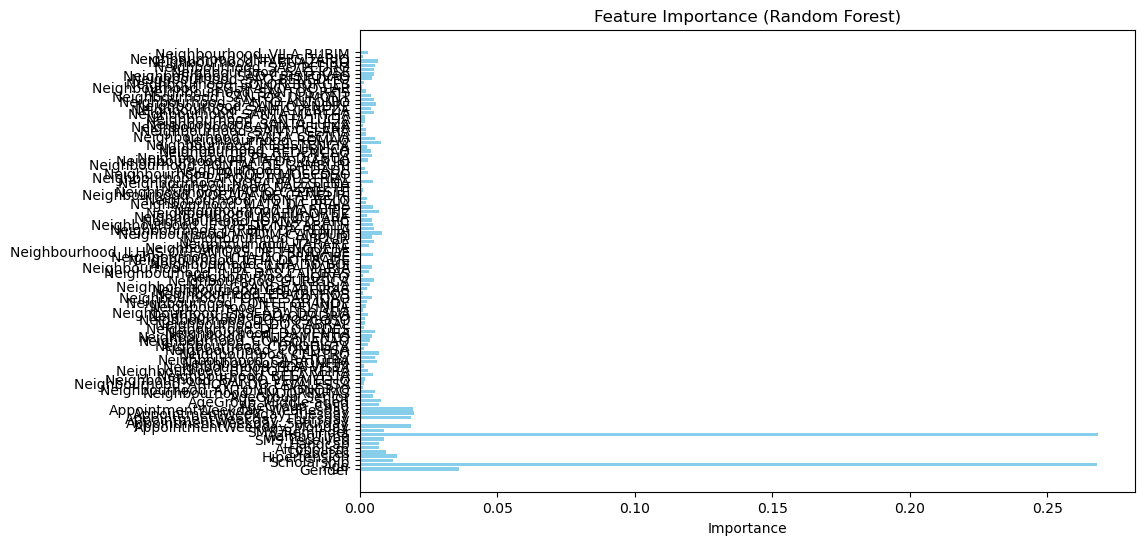

In [41]:
# Get feature names from the encoded DataFrame
features = X_encoded.columns  # Use the encoded features
importances = rf_model.feature_importances_

# Plot the feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='skyblue')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.show()



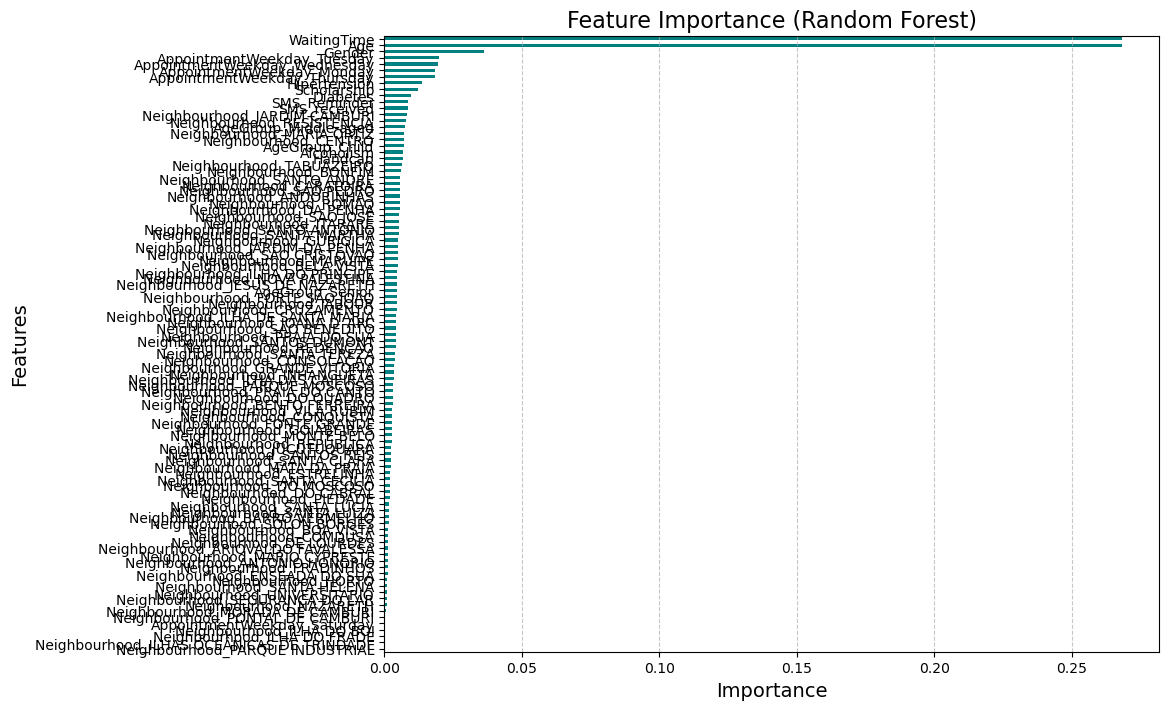

In [42]:
# Sort features and their importance
feature_importance = pd.Series(importances, index=features).sort_values()

# Plot sorted feature importance
plt.figure(figsize=(10, 8))
feature_importance.plot(kind='barh', color='teal')
plt.title('Feature Importance (Random Forest)', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


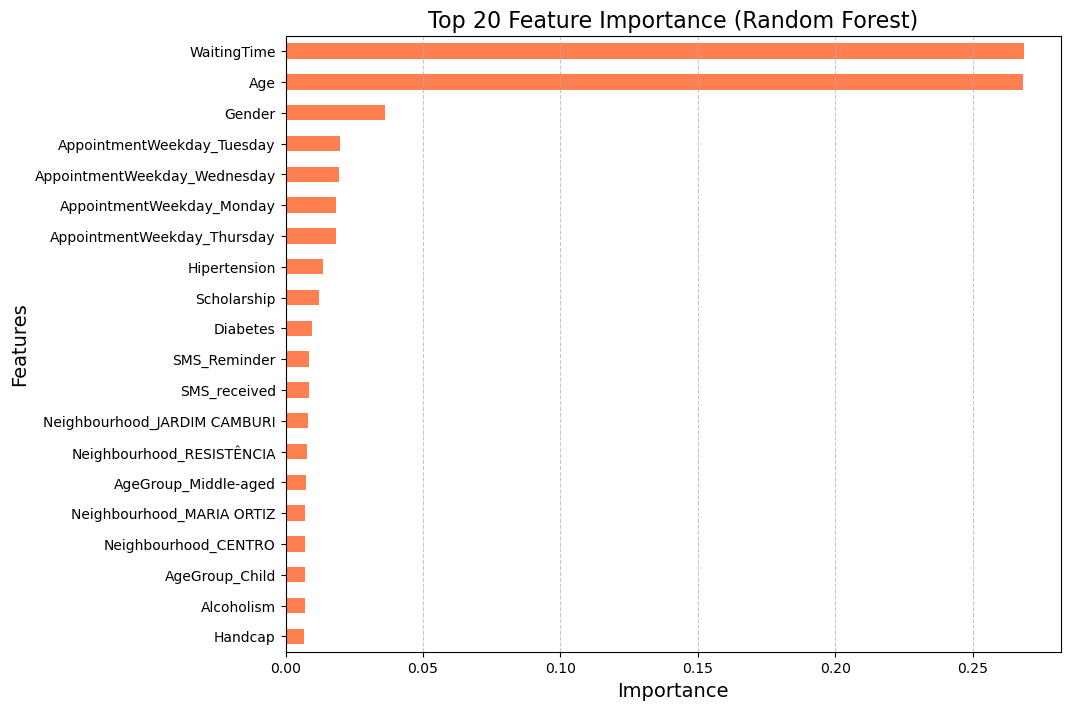

In [43]:
# Plot top 20 most important features
top_features = feature_importance.tail(20)  # Adjust number as needed

plt.figure(figsize=(10, 8))
top_features.plot(kind='barh', color='coral')
plt.title('Top 20 Feature Importance (Random Forest)', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


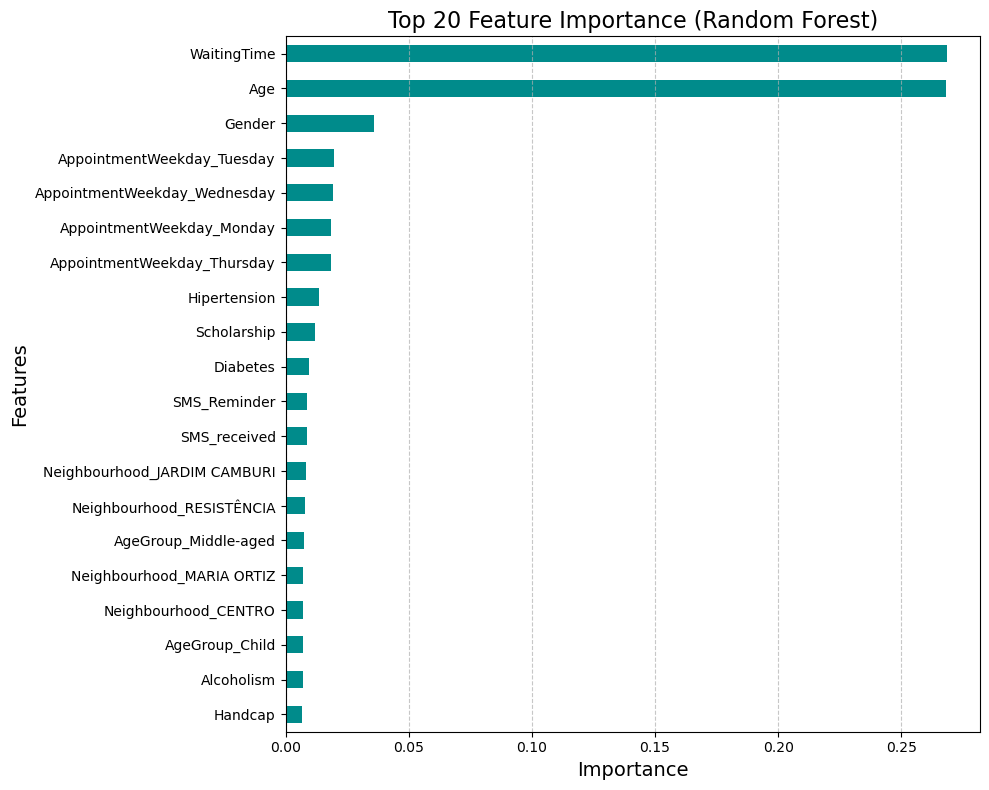

In [44]:
plt.figure(figsize=(10, 8))
top_features.plot(kind='barh', color='darkcyan')
plt.title('Top 20 Feature Importance (Random Forest)', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300)
plt.show()


In [45]:
import joblib

# Save the Random Forest model
joblib.dump(top_features, 'appointment_no_show_model.pkl')
print("Model saved as 'appointment_no_show_model.pkl'")


Model saved as 'appointment_no_show_model.pkl'


In [49]:
# Load the saved model
loaded_model = joblib.load('appointment_no_show_model.pkl')

# Predict for a new example (adjust to match your feature set)
new_data = [[30, 1, 0, 0, 0, 0, 0, 1]]  # Example data point
prediction = loaded_model.predict(new_data)

print("Predicted No-Show:", "Yes" if prediction[0] == 1 else "No")



E:\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 8 features, but RandomForestClassifier is expecting 98 features as input.

In [47]:
loaded_model = joblib.load('appointment_no_show_model.pkl')
print(type(loaded_model))


<class 'pandas.core.series.Series'>


In [48]:
import joblib

# Save the actual trained model
joblib.dump(rf_model, 'appointment_no_show_model.pkl')
print("✅ Model saved successfully.")


✅ Model saved successfully.


In [50]:
# Load the saved model
import joblib
import pandas as pd

loaded_model = joblib.load('appointment_no_show_model.pkl')

# Load the training data to get the column structure
df = pd.read_csv('cleaned_appointments.csv')

# One-hot encode the data in the same way as during training
X = df.drop('NoShow', axis=1)  # Remove the target column
X_encoded = pd.get_dummies(X, drop_first=True)

# Get the feature names
features = X_encoded.columns
print(f"Model expects {len(features)} features: {features}")


Model expects 98 features: Index(['Gender', 'Age', 'Scholarship', 'Hipertension', 'Diabetes',
       'Alcoholism', 'Handcap', 'SMS_received', 'WaitingTime', 'SMS_Reminder',
       'AppointmentWeekday_Monday', 'AppointmentWeekday_Saturday',
       'AppointmentWeekday_Thursday', 'AppointmentWeekday_Tuesday',
       'AppointmentWeekday_Wednesday', 'AgeGroup_Child',
       'AgeGroup_Middle-aged', 'AgeGroup_Senior', 'Neighbourhood_ANDORINHAS',
       'Neighbourhood_ANTÔNIO HONÓRIO', 'Neighbourhood_ARIOVALDO FAVALESSA',
       'Neighbourhood_BARRO VERMELHO', 'Neighbourhood_BELA VISTA',
       'Neighbourhood_BENTO FERREIRA', 'Neighbourhood_BOA VISTA',
       'Neighbourhood_BONFIM', 'Neighbourhood_CARATOÍRA',
       'Neighbourhood_CENTRO', 'Neighbourhood_COMDUSA',
       'Neighbourhood_CONQUISTA', 'Neighbourhood_CONSOLAÇÃO',
       'Neighbourhood_CRUZAMENTO', 'Neighbourhood_DA PENHA',
       'Neighbourhood_DE LOURDES', 'Neighbourhood_DO CABRAL',
       'Neighbourhood_DO MOSCOSO', 'Neighbourhoo

In [51]:
# Create a dictionary matching the expected columns
new_data = pd.DataFrame([[30, 1, 0, 0, 0, 0, 0, 1]], columns=features[:8])

# Add missing columns with 0 values
for col in features:
    if col not in new_data.columns:
        new_data[col] = 0

# Reorder columns to match the model's expectation
new_data = new_data[features]
print(new_data.head())


   Gender  Age  Scholarship  Hipertension  Diabetes  Alcoholism  Handcap  \
0      30    1            0             0         0           0        0   

   SMS_received  WaitingTime  SMS_Reminder  ...  Neighbourhood_SANTOS REIS  \
0             1            0             0  ...                          0   

   Neighbourhood_SEGURANÇA DO LAR  Neighbourhood_SOLON BORGES  \
0                               0                           0   

   Neighbourhood_SÃO BENEDITO  Neighbourhood_SÃO CRISTÓVÃO  \
0                           0                            0   

   Neighbourhood_SÃO JOSÉ  Neighbourhood_SÃO PEDRO  Neighbourhood_TABUAZEIRO  \
0                       0                        0                         0   

   Neighbourhood_UNIVERSITÁRIO  Neighbourhood_VILA RUBIM  
0                            0                         0  

[1 rows x 98 columns]


In [52]:
# Predict using the properly formatted data
prediction = loaded_model.predict(new_data)

print("Predicted No-Show:", "Yes" if prediction[0] == 1 else "No")


Predicted No-Show: No
